In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

cap = cv2.VideoCapture('../Downloads/top.mp4')
ret,current_frame = cap.read()
previous_frame = current_frame

#SURF

surf = cv2.xfeatures2d.SURF_create()

#LISTS
average = []

#CHECKING IF FRAME IS OPENED OR NOT

if cap.isOpened() == False:
    print('ERROR FILE NOT FOUND OR WRONG CODEC USED!')  
    
while(cap.isOpened()):
    if ret == True:
       
        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
       
        #TAKING REFERENCE FRAME
        kp1,des1 = surf.detectAndCompute(previous_frame_gray,None)
        kp2,des2 = surf.detectAndCompute(current_frame_gray,None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1,des2,k=2)
        good = []
        
        # LESS DISTANCE == BETTER MATCH

        #RATIO MATCH1 < 75% MATCH2
        for match1,match2 in matches:
            # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH2 DISTANCE
            # THEN DESCRIPTOR WAS A GOOD MATCH , LET'S KEEP IT!
            if match1.distance < 0.75*match2.distance:
                good.append(match1)
                
        #FINDING THE COORDINATES OF THE MATCHES
        list_kp1 = []
        list_kp2 = []
                
        for match1 in good:
            
                img1_idx = match1.queryIdx
                img2_idx = match1.trainIdx

                (x1, y1) = kp1[img1_idx].pt
                (x2, y2) = kp2[img2_idx].pt

                list_kp1.append((x1, y1))
                list_kp2.append((x2, y2))
                
        #FINDING THE DISPLACEMENT     
       
        i=0
        displacement = []
        for i in range(len(good)):
            p1 = list_kp1[i]
            p2 = list_kp2[i]
            distance = 0
            distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
            if distance > 230 :
                displacement.append(distance)
            
            
        #AVERAGE
        if len(displacement)>0: 
            avg = sum(displacement)/len(displacement)
        
        else :
            avg = 0
        
        average.append(avg) 
        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
            
    else :
        break
      
    previous_frame = current_frame.copy()
    ret , current_frame = cap.read()

    
print(average)
    
cap.release()
cv2.destroyAllWindows()

[0, 0, 0, 0, 237.41631546277563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 263.0518889492583, 0, 251.20786715584197, 0, 0, 258.19786428480813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 233.42111737267206, 0, 0, 0, 0, 0, 0, 0, 247.8128653208183, 0, 0, 0, 0, 239.2544902670135, 0, 243.84269001940208, 0, 0, 0, 0, 0, 0, 0, 236.42805478475418, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 232.04961775876822, 0, 0, 0, 0, 234.20616406966514, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 276.040301909344, 0, 0, 0, 0, 0, 239.70400658949112, 0, 0, 246.01244270336807, 0, 0, 0, 0, 0, 0, 0, 0, 233.43068458219972, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 242.04797198281824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 235.1438237354687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 231.75061277078166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 232.69120868993443, 0, 246.62079692190795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 232.4883148

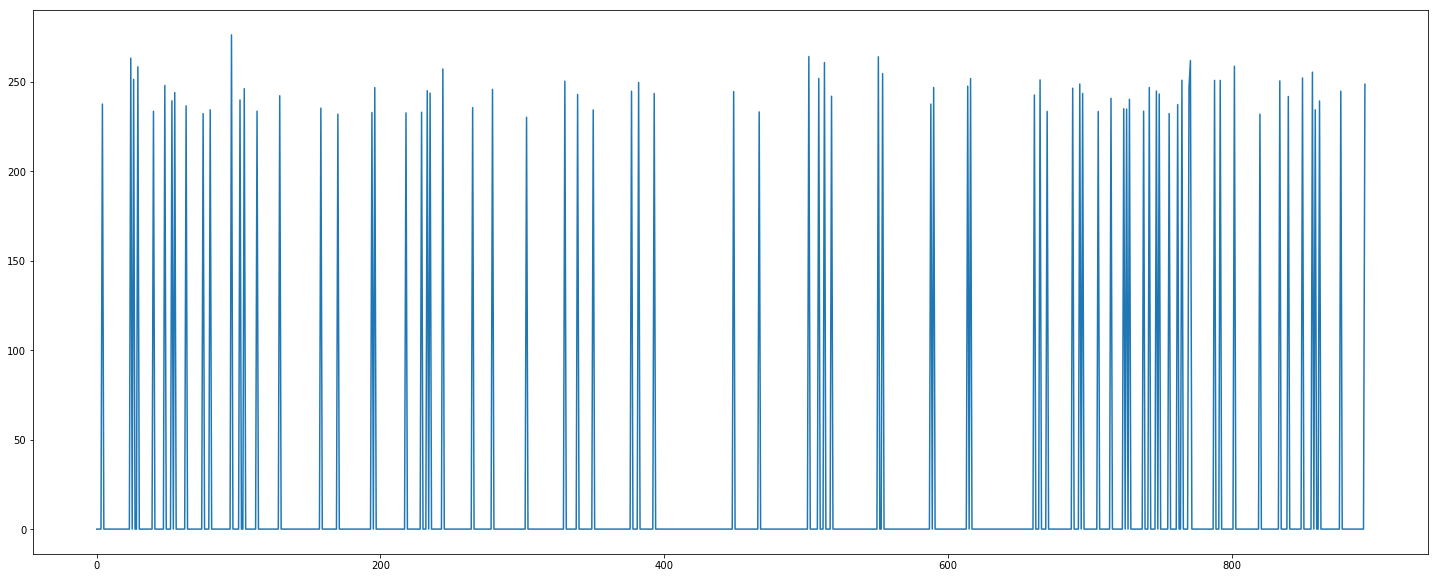

In [39]:
plt.figure(figsize=(25,10))
display(plt.plot(average ) )

In [40]:
len(average)

895

In [41]:
t = len(average)
sum_average =[]
sum_avg = 0
i = 0
k=0
for i in range(t):
    if k<2:
        sum_avg = sum_avg + average[i-1]
        k += 1
    elif k>=2:
        sum_average.append(sum_avg+average[i-1])
        sum_avg = 0
        k=0
print(sum_average)

[248.44025929638468, 237.41631546277563, 0, 0, 0, 0, 0, 0, 263.0518889492583, 251.20786715584197, 258.19786428480813, 0, 0, 233.42111737267206, 0, 0, 247.8128653208183, 0, 483.09718028641555, 0, 0, 236.42805478475418, 0, 0, 0, 232.04961775876822, 0, 234.20616406966514, 0, 0, 0, 0, 276.040301909344, 0, 239.70400658949112, 246.01244270336807, 0, 0, 233.43068458219972, 0, 0, 0, 0, 242.04797198281824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 235.1438237354687, 0, 0, 0, 231.75061277078166, 0, 0, 0, 0, 0, 0, 0, 479.3120056118424, 0, 0, 0, 0, 0, 0, 0, 232.48831487627297, 0, 0, 232.86204973421187, 0, 488.41260240240325, 0, 0, 257.0427793979608, 0, 0, 0, 0, 0, 0, 235.44361734797795, 0, 0, 0, 0, 245.58952063317884, 0, 0, 0, 0, 0, 0, 0, 230.049575417063, 0, 0, 0, 0, 0, 0, 0, 0, 250.22407608970863, 0, 0, 242.78229382752784, 0, 0, 0, 234.13435019713398, 0, 0, 0, 0, 0, 0, 0, 0, 244.61796289539745, 249.4937156604054, 0, 0, 0, 243.29833971671962, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 244.40100588808

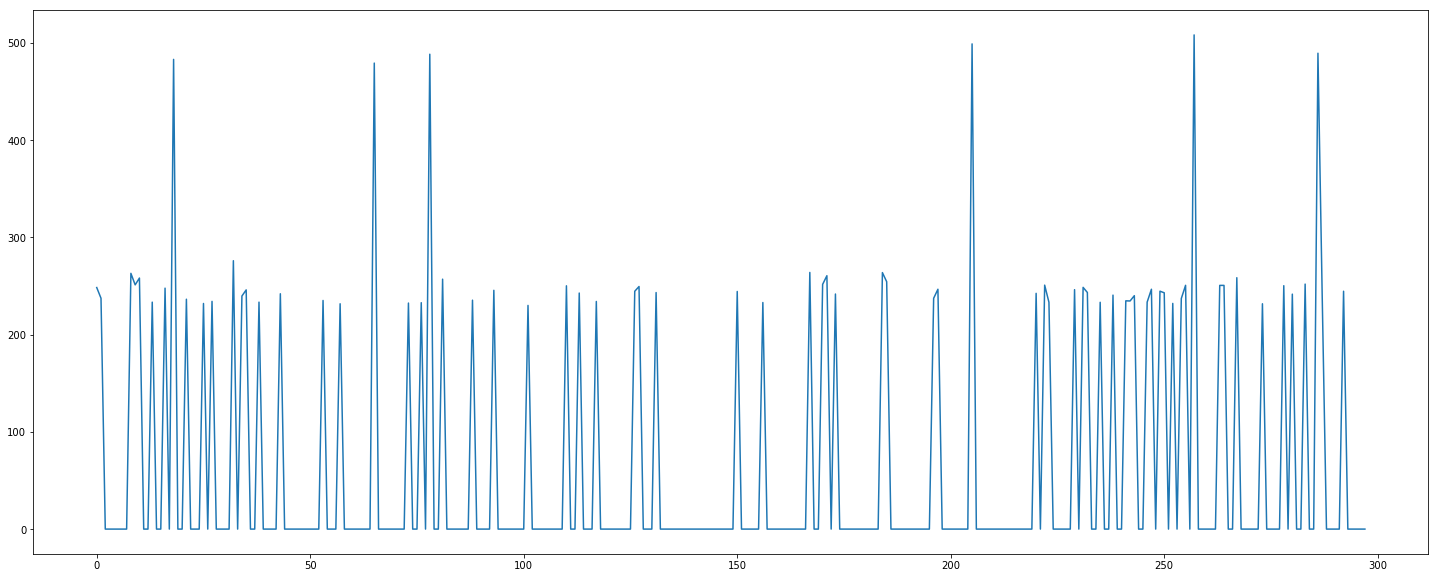

In [42]:
plt.figure(figsize=(25,10))
display(plt.plot(sum_average))

In [43]:
t = len(average)
sum_average =[]
sum_avg = 0
i = 0
k=0
for i in range(t):
    if k<5:
        sum_avg = sum_avg + average[i-1]
        k += 1
    elif k>=5:
        sum_average.append(sum_avg+average[i-1])
        sum_avg = 0
        k=0
print(sum_average)

[485.8565747591603, 0, 0, 0, 514.2597561051002, 258.19786428480813, 233.42111737267206, 0, 247.8128653208183, 483.09718028641555, 236.42805478475418, 0, 232.04961775876822, 234.20616406966514, 0, 0, 276.040301909344, 485.7164492928592, 0, 233.43068458219972, 0, 242.04797198281824, 0, 0, 0, 0, 235.1438237354687, 0, 231.75061277078166, 0, 0, 0, 479.3120056118424, 0, 0, 0, 232.48831487627297, 0, 232.86204973421187, 488.41260240240325, 257.0427793979608, 0, 0, 0, 235.44361734797795, 0, 245.58952063317884, 0, 0, 0, 230.049575417063, 0, 0, 0, 0, 250.22407608970863, 242.78229382752784, 0, 234.13435019713398, 0, 0, 0, 0, 494.1116785558029, 0, 243.29833971671962, 0, 0, 0, 0, 0, 0, 0, 0, 0, 244.4010058880801, 0, 0, 233.0353625706783, 0, 0, 0, 0, 263.9765253278531, 0, 512.2977989692299, 241.7696401825727, 0, 0, 0, 0, 0, 518.2573047732435, 0, 0, 0, 0, 0, 484.0868106958127, 0, 0, 0, 499.04141365140106, 0, 0, 0, 0, 0, 0, 0, 242.4670948893073, 484.2067634713755, 0, 0, 246.26599494366826, 248.62067598

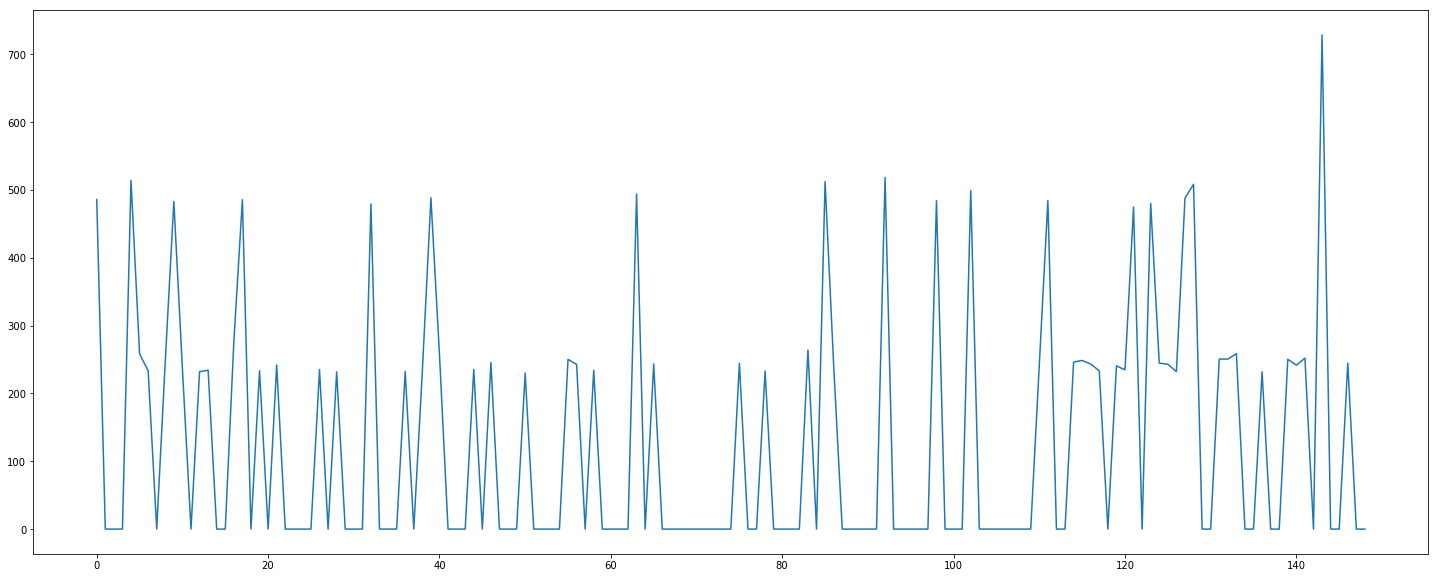

In [44]:
plt.figure(figsize=(25,10))
display(plt.plot(sum_average))

In [32]:
# print(var_dist)

In [33]:
# plt.figure(figsize=(25,10))
# display(plt.plot(var_dist))

In [45]:
900/36

25.0